In [15]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.alignment.interactive_manual import InteractiveManualRelation
from MISalign.model.image import Image
from MISalign.model.mis_file import MisFile

import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets

%matplotlib widget

In [16]:
file_paths=[
    abspath(r"..\..\example\data\set_a\a_myimages01.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages02.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages03.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages04.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages05.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages06.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages07.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages08.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages09.jpg"),
    abspath(r"..\..\example\data\set_a\a_myimages10.jpg"),
    ]
mp=MisFile(image_fps=file_paths)

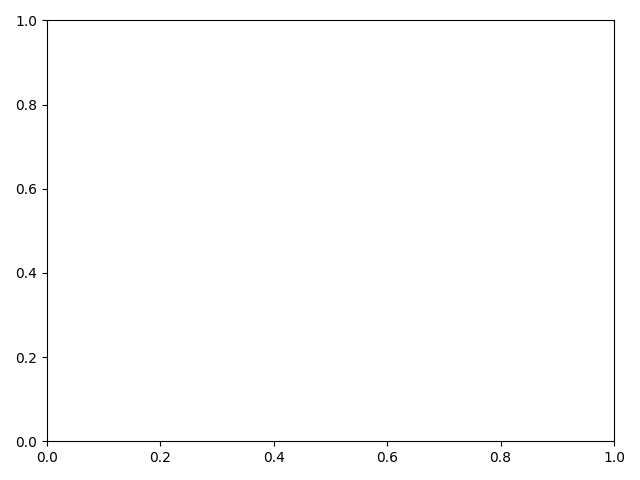

In [17]:
class IMR_Controls():
    def __init__(self,mis_project:MisFile):
        self._project=mis_project
        self._images=[Image(x) for x in self._project.image_fps]
        self.names=[x.name for x in self._images]
        ## setup dropdowns
        self._dropdown_a=widgets.Dropdown(
            options=self.names,
            value=self.names[0],
            description='Image A:',
            disabled=False,
        )
        self._dropdown_b=widgets.Dropdown(
            options=self.names,
            value=self.names[1],
            description='Image B:',
            disabled=False,
        )
        self._dropdowns=widgets.HBox([self._dropdown_a,self._dropdown_b])
        ## setup buttons
        self._button_next = widgets.Button(description='Next',)
        self._button_next.on_click(self.click_next)
        
        self._button_jump = widgets.Button(description='Jump To',)
        self._button_jump.on_click(self.click_jump)
        
        self._button_prev = widgets.Button(description='Previous',)
        self._button_prev.on_click(self.click_prev)
        
        self._button_resolve = widgets.Button(description='Resolve Relation',)
        self._button_resolve.on_click(self.click_resolve)

        self._button_save = widgets.Button(description='Save Relation',)
        self._button_save.on_click(self.click_save)

        self._buttons_move=widgets.HBox([self._button_next,self._button_jump,self._button_prev])
        self._buttons_relate=widgets.HBox([self._button_resolve,self._button_save])
        ## combine and display
        self._full=widgets.VBox([self._dropdowns,self._buttons_move,self._buttons_relate])
        display(self._full)
        ## display IMR and set to first pair.
        self.imr=InteractiveManualRelation()
        self.update_imr()
    def click_next(self,event):
        if (current := self.names.index(self._dropdown_b.get_interact_value()))+1<len(self.names):
            self._dropdown_a.value=self.names[current]
            self._dropdown_b.value=self.names[current+1]
            self.update_imr()
    def click_jump(self,event):
            self.update_imr()
    def click_prev(self,event):
        if (current := self.names.index(self._dropdown_a.get_interact_value()))-1>=0:
            self._dropdown_a.value=self.names[current-1]
            self._dropdown_b.value=self.names[current]
            self.update_imr()
    def click_resolve(self,event):
        self.imr.relate_resolve()
        self.imr.plot_points()
    def click_save(self,event):
         if self.imr.points is not None:
           self._project._relations.append(self.imr.get_relation())
        #TODO store in meaningful way. - Maybe break into resolve relation and save/update relation. Also displaying current relation?
         #TODO replacing relations vs turning them on and off vs other?
         #TODO relation management interface
    def update_imr(self):
            self.imr.change(
                self._images[self.names.index(self._dropdown_a.get_interact_value())],
                self._images[self.names.index(self._dropdown_b.get_interact_value())],
                )
            self.imr.relate()
    def get_mis(self):
            return self._project


imrc=IMR_Controls(mp)
# widgets.Select(
#      options=[]
# )

In [14]:

#TODO search by rel in misfile
imrc._project.find_all_rel(check)
def relation_describe(far,check):#takes outputs from find all rel , [[imga name, imgb name], relation type]
    rel_types={
        "r":"Rect.",
        "p":"Points",
        "rr":"Rect. and Rota."
    }
    return rel_types[far[1]]+" | "+[x for x in far[0] if check not in x][0]
check=imrc._dropdown_a.get_interact_value()
rela=widgets.Select(
    options=[relation_describe(x,check) for x in imrc._project.find_all_rel(check)],
    description='A Relations:',
    disabled=False
)
check=imrc._dropdown_b.get_interact_value()
relb=widgets.Select(
    options=[relation_describe(x,check) for x in imrc._project.find_all_rel(check)],
    description='B Relations:',
    disabled=False
)
display(widgets.HBox([rela,relb]))

In [18]:
imrc._project.get_rels('r')

[[('a_myimages01.jpg', 'a_myimages02.jpg'), (159, -550)],
 [('a_myimages02.jpg', 'a_myimages03.jpg'), (157, -521)],
 [('a_myimages03.jpg', 'a_myimages04.jpg'), (-34, -324)]]

In [20]:
print(imrc.get_mis())

A MISalign project with:[['c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages01.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages02.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages03.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages04.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages05.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages06.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages07.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages08.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\set_a\\a_myimages09.jpg', 'c:\\Users\\drago\\Documents\\MISaligned\\MISalign_public\\example\\data\\